# Twitter Sentiment Analysis

In this notebook, I will analyze sentiment of a tweet by using the most common word, polarity, and subjectivity function from TextBlob

In [6]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

### Load credential and make authentication to my twitter acc
We should make account for twitter for developer first to get authentication credentials

In [20]:
log = pd.read_csv("Login.csv")

In [21]:
#Twitter API Credentials
consumerKey = log['Key'][0]
consumerKeySecret = log['Key'][1]
accessToken = log['Key'][3]
accessTokenSecret = log['Key'][4]

In [120]:
# Create authentication object and set the access

authenticate = tweepy.OAuthHandler(consumerKey, consumerKeySecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate)

### Get tweet from a user

In [77]:
#This code is to get all tweets
for status in tweepy.Cursor(api.user_timeline, screen_name='@elonmusk', tweet_mode="extended").items():
    print(status.full_text)

@Erdayastronaut @PPathole @SpaceX Above 50% likely to make it
@PPathole @SpaceX This is a test engine. Flight articles are fixed with no gimbal.
@SpaceX Worth noting that thrust is only slightly higher with the big bell nozzle version. Larger bell is primarily for efficiency in vacuum. Aiming for 380+ sec Isp for RVac long-term. Initially likely to be ~372.
RT @SpaceX: The first Raptor Vacuum engine (RVac) for Starship has shipped from SpaceX’s rocket factory in Hawthorne, California to our dev…
@Tesmanian_com Yes
@skorusARK Chart understates lithium-ion potential by roughly 1/3
Model 3 rated as most reliable car https://t.co/26DAGJLTDY
Turns out you can make anything fly haha https://t.co/FJdHqRdVDb
@PPathole @CureVacRNA Exactly. This is not fully appreciated.
@austinbarnard45 Starship SN6 flew asimilar hop to SN5, but it was a much smoother &amp; faster operation
🇩🇪🖤Giga Berlin Mannschaft🖤🇩🇪
Vielen Dank für Ihre hervorragende Arbeit an Giga Berlin!! https://t.co/KVo5mBfnXt
Great trip

@EvaFoxU That number sure comes up a lot 🤣🤣
@ajtourville @peterdog15 I’m fine with reasonable drone footage. Just needs to be at a fair distance &amp; not coming right up to people. I think our security was a little overzealous in this case.
@GerberKawasaki @Tesla Thanks to a smart and hardworking team at Tesla. These sure are wild times …
@Teslarati Much appreciated. This was a serious attack.
@thejackbeyer @NASASpaceflight Brave Starhopper carried the day
@ItMotivatesUs Only so many days @waitbutwhy https://t.co/19h4u8TA2a
@WholeMarsBlog We were too obtuse for our own good, although I think it works esthetically. Those are folded-over current collectors at the top/bottom of the cell, which are important, but I don’t want to jump the gun on Sept 22 …
@cleantechnica But actually nothing. Was surprised to hear they’re across the road. Adding silicon to carbon anode makes sense. We already do. Question is just what ratio of silicon to carbon &amp; what shape? Silicon expands like crazy d

@AdamBlitzer @levie 💨
@justpaulinelol @NASASpaceflight That’s engine SN. We’re building SN8 of the ship.
@NASASpaceflight SN40 is about to be tested &amp; has several upgrades over 330 bar engine. For reference, 330 bar on Raptor produces ~225 tons (half a million pounds) of force.
Raptor engine just reached 330 bar chamber pressure without exploding! https://t.co/kVKRWksvaB
@Erdayastronaut Yeah, Starship will be a tiny dot at 20km. Hard to see with naked eye. We’ll do lots of flights.
@C_Bass3d @Erdayastronaut @NASASpaceflight @FelixSchlang Very impressive render. Note, legs will be bigger &amp; there’ll be way more stuff in engine bay. Main engines actually do majority of work in turning ship vertical before landing.
@PPathole @universal_sci This might sting a little …
@PPathole The “early investor” part of Tesla is wrong. That bs has been pushed by Eberhard (worst person I’ve ever worked with and that’s saying something!) for years.
@universal_sci Also, there could be long period co

@RationalEtienne @BernieSanders I wonder if he reads his Twitter feed
@BernieSanders And why aim your attacks at Tesla, when we’re doing more than any other company on Earth to advance green/sustainable energy? Have you read the news? https://t.co/34tzBk5TIv
@BernieSanders That bs was pushed by oil &amp; gas interests to distract people from the $5 *trillion* per year they receive in subsidies. Bernard Sanders is a docile puppet of big oil! https://t.co/WmzJnoTFzI
@Siconik1 @WR4NYGov @28delayslater @BernieSanders 🎯
@WR4NYGov @BernieSanders Good analysis. He also includes a govt loan for high efficiency vehicles that Tesla paid back with interest several years, unlike other auto companies.
@westcoastbill 💯
@johnkrausphotos @Erdayastronaut @queue_max @NASASpaceflight Yeah, full name of engine is Velociraptor or Raptor for short
@tobyliiiiiiiiii @Erdayastronaut @queue_max @NASASpaceflight Haha, good catch. Booster will have fixed legs that add ~2m in height.
@Erdayastronaut @queue_max @NA

@tobyliiiiiiiiii Sure
Sure could use a good rave
What’s your favorite techno
I … I just died in your arms tonight
The rumor that Bill Gates &amp; I are lovers is completely untrue
@WholeMarsBlog @PPathole Yeah. Display will also soon render Teslas specifically as their model &amp; color instead of as a generic sedan/SUV. Has potential for a fun punch buggy sort of game.
@keith31345919 @PPathole https://t.co/S8mdWgCdFg
@keith31345919 @PPathole We’ve been working on this for about 4 years. Originally meant for rabies vaccine, but it can make pretty much anything that’s an RNA sequence. Critical path is completing human trials.
@keith31345919 @PPathole https://t.co/0kAAv0DtNn
@PPathole 🎶 Billy G is not my lover 🎶
@PPathole Sounds like he doesn’t realize Tesla makes the vaccine machine for CureVac
@mkarolian @Tesla Thanks for letting me know. Will dig into it.
@GreenDragonBot 😉
@thesheetztweetz Sum &gt; parts
@Teslarati Should add a few miles of range, more in slow traffic
@Kristennetten @

@cleantechnica At some point, we should probably do advertising as art/communication/entertainment &amp; to support high quality media
RT @SpaceX: Watch Falcon 9 launch ANASIS-II → https://t.co/bJFjLCzWdK  https://t.co/iYHJZnZobv
Das baby kann noch keinen löffel benutzen https://t.co/UETqVIA4BP
@JohnnaCrider0 @YStijd @ID_AA_Carmack It’s almost right
@YStijd @ID_AA_Carmack We talked about an hour ago. He seems fine.
@ID_AA_Carmack VR Twitter with avatars saying the mentions 😈
@cleantechnica Better to put the money into the product than sales &amp; marketing!
@PPathole We should bring Life to Mars
Both fairing halves caught from space by @SpaceX ships!
RT @SpaceX: Falcon 9’s first stage has landed on the Just Read the Instructions droneship https://t.co/fPbckYFySh
@SpaceX Nice work, SpaceX team!
@flcnhvy @AstroBehnken @Astro_Doug @SpaceX Still long way to go. Reuse only matters to degree that it’s rapid &amp; complete.
@nasahqphoto Too long since we were last there
Launch in 20 mins http

@PPathole That is the near-term danger of AI
@nichegamer I didn’t mind DA2. DA1 was awesome. Mass Effect 2 (talking about sequels) is amazing.
@MKBHD Haha
@OprahSide Maybe he should design flag of Mars
@engineers_feed 48 65 78 20 74 6f 20 74 65 78 74
https://t.co/1MQXFAKPzf
I spoke with Korolev’s family today.
He was one of the very best.
Корольов / Королёв.
@Ali_Afshari In general, we need to improve how podcasts play
@OptimoPrincipi SPQR https://t.co/gVfc9M3BHz
@djzinc @kenyanwalstreet True haha
@RationalEtienne @flcnhvy @PPathole @IheartTesla Death is the loss of information
@thatt3slaguy @flcnhvy @PPathole @IheartTesla Earning power post augmentation would easily pay for itself (if that’s even necessary). This is the best thing I can think of to ensure that collective human will decides the future.
@flcnhvy @PPathole @IheartTesla Absolutely
@TeslaParaTodos @EvaFoxU @Tesla 👀
@mjkapkan @EvaFoxU @Tesla Probably a good one to design &amp; engineer in Germany
@blue_bnd @EvaFoxU @Tesla E

@kimbal We’re seeing field false positives much higher than lab false positives, in range of 5% to 10%. Article says testing went from 100k to 600k, which means a 6-fold increase in false positives. My guess is most cases, especially “no symptoms”, are false positives.
@WhatsupFranks @flcnhvy @RationalEtienne @chrish7985 @rlyrlysryDave Yes
@flcnhvy @RationalEtienne @chrish7985 @rlyrlysryDave The news is sometimes created, but always curated. The latter is most pernicious. On any given day, there are thousands of potential stories. By picking which stories are written about &amp; how prominently they’re placed, a handful of publishers control much of the public narrative.
@flcnhvy @RationalEtienne @chrish7985 @rlyrlysryDave Klippenstein has gone full twitter troll. Big mistake. Never go full troll!
@RationalEtienne @chrish7985 @rlyrlysryDave Oh yeah, Klip Einstein, pseudojournalist &amp; douche-about-town
@EvaFoxU @chrish7985 @rlyrlysryDave 😂😂
@chrish7985 @rlyrlysryDave Someone is payin

@SamTalksTesla Jay is awesome
@flcnhvy @Teslarati Absolutely!
@Teslarati Giga Berlin is gonna rock!
.@JeffBezos is a copy 🐈 haha https://t.co/plR7uupqBG
@SciGuySpace It’s close though 😅
@Space_Mog This makes no sense for many other reasons too. They don’t actually have spectrum priority, they have shared spectrum &amp; nothing about this company is UK, except post office box. Money would be better spent on actual UK satellite industry!
@vincent13031925 @TeslaRoadTrip Glad you like it!
@TheBabylonBee @Vagn_Henning Great idea
Who controls the memes,
controls the Universe
https://t.co/e9dPKVSjjl
@its_menieb 🤣🤣
Literally
Only a matter of time before someone steals a Tesla while playing GTA on a Tesla
@teslaownersSV Very meta, but yes
@hentesla True
@BLKMDL3 Coming soon
North American Supercharger usage tracking to exceed pre covid highs in 2 to 3 weeks. Lot of noise out there. This is signal. https://t.co/PCC5DlthtA
@CybertruckN I think we could make that work
@lulusdave @Tesla Glad you’re

@Teslarati No larger pack Model 3 is in development
@tesla_peter @t0mmyr Actually, we’ve made slight changes, but the range improvement is &gt;90% efficiency
@cleantechnica Cool
@ZJasko Physics doesn’t care about politicians
@jgold310 Coming soon
All Model S cars made since late Jan have 402 mile range. This is just making it official.
Tesla Model S now first ever electric vehicle to receive EPA range rating above 400 miles! https://t.co/EOTwVfvHS5
@flcnhvy Absolutely
China &amp; Asia Pacific Supercharger usage above pre-covid highs. North America catching up fast. Europe slightly behind. https://t.co/Em23E2AFyO
@VitalVegas Looking likely
@Mad_Maelstrom @Peter_J_Beck @torybruno @Starlinksat223 @Erdayastronaut Throttling is done by adjusting flow to the ox and fuel preburners. The lower limit of thrust is ox &amp; fuel turbopump injector preburner “stiffness”, essentially when do the preburner elements start flaming out.
@SciGuySpace Tank didn’t burst, but leaked at 7.6 bar. This is a g

@Erdayastronaut @flcnhvy @NASASpaceflight Yeah. Even stacking on the pad will be quite an adventure!
@Erdayastronaut Creating the production system is &gt;1000% harder than building one rocket. This is the truly hard thing.
@Erdayastronaut It’s insane
@nextspaceflight @alvianchoiri @timmerenginerd @kulpability @NASASpaceflight Pursuing all three. Hard to say right now.
Gateway to Mars
@RenataKonkoly @flcnhvy @PPathole @rSpaceX @SpaceX Lot has happened since then!
@alvianchoiri @timmerenginerd @kulpability @NASASpaceflight 3600 tons of propellant, almost 80% of which is densified liquid oxygen
@flcnhvy @PPathole @rSpaceX @SpaceX Haha true
@rSpaceX @SpaceX SpaceX Software AMA
@NASASpaceflight Yeah, for Super Heavy stacking
@NASASpaceflight Giant high bay coming soon
Starship Production Complex
Boca Chica, Texas https://t.co/pd4ka93bv5
@venus47203379 @MKBHD What a cute &amp; happy dog!
@MKBHD Big line at the barbershop
@akidesir Thursday
@CodingMark I guess more people need to get more in

Made on Earth by humans
https://t.co/72pvzGWAs8
@cbs_spacenews @NASASpaceflight Cool
@RyanMaue @flcnhvy @jayleno Pretty much
@flcnhvy @jayleno Reviewed design with Franz last night. Even 3% smaller is too small. Will be pretty much this size. We’ll probably do a smaller, tight world truck at some point.
@flcnhvy Haha true! Hard to convey tone in tweets. Many people would probably be a lot less upset if they heard me speak the words.
@nichegamer 🤣🤣
@SpaceX Astronauts to orbit in 5 days!!
@cleantechnica Fate 🖤 Irony
The medium is the message https://t.co/IOu4JogVmF
@archillect Time to return
@SaulRight2017 New New Hampshire license plate?
Open your eyes, look up to the skies
@anzhelikashhhh Когда рак на горе свистнет
@RickandMorty Great episode
@coollstranger Мне очень нравится звучание русского языка
@Erdayastronaut @WhatsupFranks @SpaceX Sure
@cybrtrkguy @28delayslater @WhatsupFranks @SpaceX Jay *really* knows cars! Next-level.
@SciGuySpace I’m a big fan of Kathy Lueders!
@28delayslate

@flcnhvy For sure ♥️
@Darktionary @AlexBerenson @Barnes_Law @Facebook Best group on FB by far
RT @SpaceX: Simulator of Crew Dragon docking with @space_station → https://t.co/vVqJfnbuNC https://t.co/ZH3bkT0DhM
@nichegamer @Crusade4change @realDonaldTrump Personally, I think we should https://t.co/kfui7W9VTU
@flcnhvy @Erdayastronaut @jack This is getting annoying. Honestly, I’m not sure it’s even helping their scam!
@Crusade4change @realDonaldTrump Those who always disagree have a closed mind … but, by their very nature, that won’t sink in (sigh)
@thirdrowtesla It’s not often that the Governor of California &amp; the President agree!
@realDonaldTrump Thank you!
@AlexBerenson It appears that what he is saying is untrue
@sara_boutall @RenataKonkoly @Johnnaaaaaaaaaa @MichaelGalanin @romanhistory1 @engineers_feed @Kristennetten 🤣💕
@archillect Lil baby
@WolvesSuperfan Great
@Arin_Dom90 Tough call. Maybe Newton by a small margin. Both obviously extremely smart for a human.
@Johnnaaaaaaaaaa Wow

@TesLatino Peak rate of about half that for version 1 is about right, but heavily dependent on users per cell. Aiming for latency under 20 ms.
@Johnnaaaaaaaaaa @EvaFoxU @Tesla It will only work for higher latitudes (Seattle) at first, then get progressively closer to the equator
@Johnnaaaaaaaaaa @EvaFoxU @Tesla Sure :)
@EvaFoxU @Tesla Way more important than it sounds
@GavinNewsom Yeah!!
@Erdayastronaut @ValkyrieBaron11 @flcnhvy @NASASpaceflight A fully &amp; rapidly reusable orbital rocket is fundamental to extending life beyond Earth. Propellant cost is roughly a 1000th of vehicle cost (unless using a foolish propellant). Same principle as cars, planes, boats, etc.
@Erdayastronaut @ElonHarith @flcnhvy @NASASpaceflight SLS makes me feel sad
@WhatsupFranks @NASASpaceflight No, they will be smashed beyond repair &amp; corroded
@flcnhvy @NASASpaceflight Yeah, although hydrogen is not a great choice for a booster engine
@ABauerle5 A great mystery of the universe
@NASASpaceflight It’s so t

Oh, say does that star-spangled banner yet wave
Gave proof through the night that our flag was still there
And the rocket's red glare, 
the bombs bursting in air
Now give people back their FREEDOM
Tesla stock price is too high imo
I am selling almost all physical possessions. Will own no house.
@PPathole @AP4Liberty Incentives matter
@SciGuySpace Starship is making good progress
RT @JimBridenstine: Why our Launch of the @NASA &amp; @SpaceX Demo-2 Mission to the @Space_Station  is Essential: https://t.co/HPjWTsB7xy https…
@AP4Liberty What is real any more
@MiniLaddd You got it!
@GerberKawasaki Exactly
@The_UNLEASHD @casper5803 @coherentstates Well said
@JamesOKeefeIII This needs to stop
RT @vincent13031925: Tesla Reached 1,000 Solar Roof Production In A Single Week, Exceeding 4MW https://t.co/hW5WPdv6np
@OpenAI AI makes more progress
This is misleading to the public
Classifying all deaths as corona even if corona didn’t cause the death is simply a lie https://t.co/R1sgzcFS46
RT @AdamDra

@hoffjlh @HardcoreHistory It’s great
Welcome @hiromichimizuno to the Tesla board! Honored to have you.
@billycrammer @FlaTesla @Tesla 👍
@_youhadonejob1 🤣🤣
Starship SN4 tank on test stand https://t.co/zN2OmMp1OS
@WhatsupFranks Yes, same results are showing up pretty much everywhere on Earth. Contagion is higher in high pop density cities &amp; mortality proportionate to age.
Silver lining is that mortality rate is much lower than predicted &amp; herd immunity much higher. Good news. https://t.co/brlQk5XDBf
@ajtourville @psidart @TOGregTO Maybe Cybertruck will have it …
@psidart @TOGregTO I’m dying to do super efficient, quiet home HVAC with HEPA &amp; water distillation. It’s weird, but I really want to do it.
@westcoastbill Good one
@jgrano305 @teslaownersSV @TOGregTO Will talk with team. We have a lot on our plate!
@teslaownersSV @TOGregTO Side camera view looks a little weird, as meant for self-driving, but will review with team. Image will need a little post-processing.
@TOGregTO Th

@xkcdComic 🤣
Good progress, but 18 years to launch our first humans is a long time. Technology must advance faster or there will be no city on the red planet in our lifetime. https://t.co/uzSpZFFemI https://t.co/IsICexqxtV
@Teslarati Pretty much, although we also sent some Medtronic units, which are meant for extreme situations. Those require a lot of work to set up &amp; operate. Should be used sparingly. SpaceX is making the valve at the heart of that system.
@AngelNDevil2 @S_Padival @fourthrowtesla @TESLAcharts It’s a hard problem, mostly due to esthetics, but it’s the future we should have
@Kristennetten @TeslaGong @mattkalin @kimbal Reviewing overall system with vehicle engineering team next week. Should have number then.
@jgrano305 @TeslaGong @mattkalin @kimbal Reduced size by ~3%, center line is more level &amp; lower window sill height
@JohnCrumrine @neiltyson 🤣🤣
@TeslaGong @mattkalin @kimbal All new
@neiltyson It is about 10% too small, but lots of fun 😀
@mattkalin @kimbal We’

@SciGuySpace True. Only reason other medium &amp; heavy lift rocket companies are winning any missions at all is due to govt intervention. Otherwise, they’d be as defunct as expendable airplane companies. ULA is powered by lobbying.
To be clear, Fremont &amp; Shanghai will also be upgraded over time, but it’s hard to retrofit these improvements to an operating paint shop
Initial production at Giga Berlin is Model Y
@brandonbernicky You will be able to wrap it in any color or pattern
@justpaulinelol There’s tough competition for that title, but we will give it our best shot!
Giga Berlin will have world’s most advanced paint shop, with more layers of stunning colors that subtly change with curvature
@thirdrowtesla This will happen
@PPathole @thirdrowtesla We stole that from cheetahs
@thirdrowtesla In case it’s not already obvious, our product plan is basically stolen from Spaceballs
@Sofiaan @thirdrowtesla There’s a lot to talk about just on the battery front, so, yeah, just that. I gues

@PPathole @austinbarnard45 @LabPadre Pretty much. Good news is that this was a test configuration error, rather than a design or build mistake. Not enough pressure in the LOX tank ullage to maintain stability with a heavy load in the CH4 tank. This was done with N2.
RT @Medtronic: #MDTisMobilizing with @elonmusk. Our collaboration with @Tesla / SpaceX is bearing fruit. @SpaceX is now making a vital comp…
@HenryFordNews @Tesla 👍
Press any key to continue
https://t.co/gFnlYoUGdy
@NYCHealthSystem @Tesla You’re welcome!
u r o k
@teslaownersSV @28delayslater @thirdrowtesla Tesla is on second rev of internal ventilator design. Will post an update on this tomorrow.
@steezyysosa @teslaownersSV @28delayslater @thirdrowtesla Yeah, about $35k with shipping &amp; taxes
@teslaownersSV @28delayslater @thirdrowtesla Bought, but SpaceX is spooling up to manufacture proportional solenoid valves for Medtronic (confirmed as critical today with chair &amp; CEO) https://t.co/zIuesSaXrZ
@28delayslater @thir

@InSpaceXItrust @Kristennetten @thirdrowtesla Could maybe tap the condensation for water too. Seems odd that HVAC systems make pure, fresh water &amp; just dump it on the ground.
@SteveHamel16 @JordanWells33 @hereforthecom19 @ScottWapnerCNBC Thanks Tesla China team, China Customs Authority &amp; LAX customs for acting so swiftly
@SteveHamel16 @JordanWells33 @hereforthecom19 @ScottWapnerCNBC Yup, China had an oversupply, so we bought 1255 FDA-approved ResMed, Philips &amp; Medtronic ventilators on Friday night &amp; airshipped them to LA. If you want a free ventilator installed, please let us know!
@Kristennetten @thirdrowtesla Yeah, pretty much. House could talk to car &amp; know when you’re expected home, so temp &amp; humidity would be perfect just as you arrive. No wasted energy.
@romn8tr @stephenpallotta @ajtourville @Teslarati This is a way bigger deal than most people realize
@stephenpallotta @ajtourville @Teslarati Sure would love to do home hvac that’s quiet &amp; efficient, wi

@PPathole Awe tow co wrecked
Abysmal autocorrect might be the #1 reason people don’t fear AI
Fear the memesphere
@nichegamer Wild times …
@j_potoski @AdrianaGalayda @PPathole @1971capital @MLevitt_NP2013 Exactly
@nichegamer Seems to be happening a lot
@1971capital @MLevitt_NP2013 Very sensible. Knows how to handle exponential functions in reality.
@RiganoESQ @DiderRaoult Whether Z-pak works in this situation or not, it’s a kickass med for many maladies https://t.co/UM2TqYpZQZ
@mikefthomp If Jamis needs help, he has many friends, me among them
@fael097 Pretty close. Design is evolving rapidly. Would be great to flatten domes, embed engines &amp; add ~1.5 barrel sections of propellant for same total length. Also, current legs are a bit too small.
Hydroxychloroquine probably better
https://t.co/FWn2kh1LZx https://t.co/wQODHiFeWT
@PPathole Sounds sensible
That said, danger of panic still far exceeds danger of corona imo. If we over-allocate medical resources to corona, it will come at expe

@vincent13031925 Definitely
https://t.co/Yt0zkj1R5j
@flcnhvy @JaneidyEve We’re stripping SN2 to bare minimum to test the thrust puck to dome weld under pressure, first with water, then at cryo. Hopefully, ready to test in a few days.
@JaneidyEve There’s a puck at the base that takes the engine thrust load. Don’t shuck the puck!
Where’s Flextape when you need it!?
It’s fine, we’ll just buff it out
So … how was your night? https://t.co/tbJDYIQjXd
@annerajb @RealEmirHan Yes, dramatically improved imo
@annerajb @RealEmirHan We need to finish work on Autopilot core foundation code &amp; 3D labelling, then functionality will happen quickly. Not long now.
@RealEmirHan 👀
RT @SpaceX: Falcon Heavy will launch @NASAPsyche! The mission, for which @NASA requires the highest level of launch vehicle reliability, wi…
@Universe_SkyArt @TwitterSupport I just sent a note to Twitter to clarify that posting SpaceX videos is fine by us and we paid for rights to Bowie song for the Falcon Heavy launch
@LeeHud

@teslaownersSV @fermatslibrary a=F/m is the most fun
@fermatslibrary Editing error. Meant to say Δt≥ℏ/(2ΔE). Interesting that monochrome is roughly a millionth of a percent.
@fermatslibrary Frame rate Δt≥ℏ2/ΔE
@fermatslibrary The resolution of reality
@archillect Reminded me of The Lady of Shalott by Waterhouse
@VitalVegas @boringcompany @LVCVA Haha
@archillect unNERVing
@flcnhvy @Erdayastronaut @robert_zubrin The joints will have shielding, but it’s hard to ensure a good seal. Transpiration cooling (or simply higher pressure cold gas flow) would purge the area behind the hot gas seal.
@Erdayastronaut @robert_zubrin Might be used around flap joints
@teslaownersSV @Tesla Will take action
Only the heart senses beauty
@Erdayastronaut @flcnhvy @robert_zubrin Shielding is only needed for orbital speeds
💘 be still my beating heart 💘 https://t.co/Fnly6DNLIC
@Erdayastronaut @robert_zubrin Unfortunately, Starship unlikely to survive LEO entry intact without shielding on windward side, but none 

@TheReal_Psyche Sorry!
@SamTalksTesla A PhD is definitely not required. All that matters is a deep understanding of AI &amp; ability to implement NNs in a way that is actually useful (latter point is what’s truly hard). Don’t care if you even graduated high school.
@John_Gardi Not needed, but will be very useful on Mars due to light speed latency
Tesla will hold a super fun AI party/hackathon at my house with the Tesla AI/autopilot team in about four weeks. Invitations going out soon.
We are (obviously) also looking for world-class chip designers to join our team, based in both Palo Alto &amp; Austin
Dojo, our training supercomputer, will be able to process vast amounts of video training data &amp; efficiently run hypersparce arrays with a vast number of parameters, plenty of memory &amp; ultra-high bandwidth between cores. More on this later.
Our custom 144 TOPS in-vehicle inference computer, where almost every TOP is useable &amp; optimized for NN, far exceeds anything else in volume

@JaneidyEve Yeah, we just finished two more propellant domes. SpaceX team &amp; supporting suppliers are doing amazing work ramping Starship production.
@TJ_Cooney @SpaceX Nice shot
Improved Accommodations https://t.co/iRBK2yIfd7
@detroitnews Yay!
@vm_one1 @Exhaustedpengu1 @RationalEtienne Would like to take a moment to thank Michael &amp; Ze’ev for helping Tesla. It was very hard work &amp; both could’ve just rested on their laurels. Much appreciated 🍻.
@nichegamer 🤣
@PicklePunchD @flcnhvy @thirdrowtesla @Gfilche @Sofiaan @Kristennetten @vincent13031925 Walk this way https://t.co/okyi7invhi
@flcnhvy @thirdrowtesla @Gfilche @Sofiaan @Kristennetten @vincent13031925 Great talking with @thirdrowtesla!
@nichegamer https://t.co/RPcGOjPtfF
@vm_one1 @Exhaustedpengu1 @RationalEtienne Michael Marks, then Ze’ev Drori, but I helped out as co-CEO as they didn’t have much automotive domain expertise
@SpaceX Dragon trunk from in-flight abort test is in surprisingly good shape! https://t.co/IGeffiNh9

@flcnhvy @nextspaceflight @SmileSimplify @SpaceX Ok, tho could be gnarly
@nextspaceflight @SmileSimplify @SpaceX Destroyed in Dragon fire
@SmileSimplify @SpaceX We tried to design a way to save B1046, but not possible 😞
Critical test launch before flying astronauts is green for Jan 18 https://t.co/r4mcuCfCil
@strangecosmos @annerajb Soon
@annerajb Hard gothic
@d1rtydan Haha
We are trapped in a prison of fonts
@flcnhvy @Erdayastronaut @BocaChicaGal @NASASpaceflight Yes
@RQuiddich Every tank under pressure is a balloon tank — it’s just question of degree. Starship tanks are not balloon tanks like Atlas in sense that they don’t collapse when depressurized on the ground.
@Erdayastronaut @BocaChicaGal @NASASpaceflight Everything is compressible, but liquid compression at these pressures is not significant. However, the tanks do expand under pressure, creating a bit more volume. Keeping propellant super cold has a big effect on density of ~10% in case of CH4.
@Erdayastronaut @BocaChicaGal @N

@ToscaMusk @kimbal ❤️ you too sis
@SMZGallagher @Tesla Sorry about this. We will do our best. The Tesla production &amp; delivery teams have been working super hard.
@JohnnaCrider1 @mayemusk Literally. It was at 40th &amp; Baltimore in Philadelphia before gentrification.
@JaneidyEve @johnkrausphotos @austinbarnard45 @flcnhvy @Joe__Wakefield @tjq1190 @tyger_cyber @fawfulfan @_Mikemo Ramones &amp; Bach
@johnkrausphotos @austinbarnard45 @flcnhvy @Joe__Wakefield @tjq1190 @tyger_cyber @fawfulfan @_Mikemo I hope someone has pics! My Mom came to visit one weekend &amp; was quite surprised by it all, but helped work coat check &amp; guarded the cash with a kitchen knife 🤣🤣
@austinbarnard45 @flcnhvy @Joe__Wakefield @tjq1190 @tyger_cyber @fawfulfan @_Mikemo To pay rent, we turned our house into a nightclub &amp; charged a $5 entry fee. Looked cool at night, but insane by day … blacklights, luminescent spray paint &amp; metal junk sculptures.
@kimbal 🖤 you too
@catmonocle69 Sounds like a Marxist 

@cgpgrey My wiki is a war zone with a zillion edits. At least it’s obviously not curated! Some day, I should probably write what *my* fictionalized version of reality is 🤣🤣
@RenataKonkoly Yes 🤣♥️
@TechnologicAli Started Zip2 with ~$2k &amp; ~$100k of student debt, rolled proceeds into X/PayPal, rolled proceeds again into SpaceX/Tesla, but these are all companies where I played fundamental founding role. Not right to ask others to put in money if I don’t put in mine.
If Tesla &amp; SpaceX go bankrupt, so will I. As it should be.
Just looked at my wiki for 1st time in years. It’s insane! Btw, can someone please delete “investor”. I do basically zero investing.
Pre VFX cut would be $$$$
@newscientist Another milestone
@RationalEtienne @DonchoGunchev @Tesla @karpathy Sending you healing vibes …
@RationalEtienne @cleantechnica That’s certainly our impression, but it’s an old version of Tesla software, so effect is limited
@cleantechnica “In-house” 🤣🤣
The real reason for Looper was to travel

RT @SpaceX: Liftoff! https://t.co/4w7OTmnay1
RT @SpaceX: Webcast of Falcon 9 launch now live  https://t.co/Ln5xGq83CT
RT @SpaceX: Falcon 9 launch of Dragon targeted for 12:29 p.m. EST, 17:29 UTC. Winds are looking better ahead of today’s attempt → https://t…
RT @SpaceX: T-30 minutes until Falcon 9 launch of Dragon. Weather is over 90% favorable for today’s launch attempt → https://t.co/gtC39uBC7z
RT @SpaceX: Standing down today due to upper altitude winds and high winds at sea creating dynamic conditions around the Of Course I Still…
RT @Tesla: Model X just earned 5 stars from Euro NCAP in safety testing
RT @SpaceX: Falcon 9 and Dragon are vertical ahead of today’s resupply mission to the @Space_Station. Launch is targeted for 12:51 p.m. EST…
RT @NASA: The @SpaceX Falcon 9🚀 &amp; Dragon🛰️ are preparing for a Dec. 4 launch on a resupply mission to @Space_Station. Today, watch NASA TV…
Launching third flight of this Dragon spacecraft to @Space_Station tomorrow https://t.co/mTQ2DrWS97
@Ra

RT @Tesla: Cybertruck Unveil starts at 8

Stay tuned for livestream https://t.co/zrbsoKKLd7
Long journey
Tonight https://t.co/pVAv4v1h8b
@Erdayastronaut @SpaceX Absolutely, but to move to Mk3 design. This had some value as a manufacturing pathfinder, but flight design is quite different.
@MKBHD Maybe won’t need a key at all
@TeslaTested So many reporters gave Chanos airtime when he called Tesla a worthless fraud. Now that he has been proven wrong, silence …
@lexfridman @NSF Gravitas is overrated https://t.co/4MdteBfEjY
@SupaZT @Erdayastronaut That would be cool
National Science Foundation, u should add a W to ur name. Would get way more clicks. Ur welcome.
https://t.co/lvCnlztkPa
78% of people want to gentrify Mordor
@slashdot The China space industry is very impressive
@mrclipsmaniac Cephalopods have a strange intelligence
@justpaulinelol @universal_sci It certainly does
@universal_sci True
@teslaownersSV @Teslarati Not sure. Maybe write or message carmakers who oppose the environment

@Teslarati Putting Model S in range mode is the opposite of launch mode, as it minimizes performance in favor of range. Show should be called “Low Gear”!
Tesla Solarglass vs 🎃 
Happy Halloween!! https://t.co/p5tXeJYqne
@stephenpallotta @Teslarati Sorry, Drag Times is correct, Top Gear is wrong
@Teslarati Drag Race Times analysis is correct. Also, there’s a software upgrade for Model S coming out that increases peak power by 50HP, so Model S should beat Porsche Taycan Turbo S by a wider margin in 0 to 60 &amp; 1/4 mile races.
@TeslaNY Walking on a Tesla Solarglass roof is definitely no problem!
Thank for helping grow sustainable energy through solar! https://t.co/zH08AMhVMj
@tobi @chris__lu @MarkRober @MrBeastYT Congrats! Shopify is great btw. Nice work.
@flcnhvy The fires are all too real
@NutaIie Haha true
@TeslaStars @Tesla …
♥️ snacks ♥️ https://t.co/LPcZyX607f
@johnkrausphotos @NASA @Space_Station Hard to say with high accuracy, but 4 to 6 weeks is my best guess
Soon, SpaceX will l

@Ingvar_Oolsen @neiltyson @Space_Station Looking forward to Kerbal 2!
@MartianDays @Erdayastronaut @torybruno @AerojetRdyne We def could be wrong about this, but it’s actually good to fix high efficiency vacuum engines with giant nozzles in place &amp; only thrust vector engines with smaller nozzles. Don’t need a lot of room &amp; moment of inertia is much lower.
@nextspaceflight @Erdayastronaut @torybruno @MartianDays @AerojetRdyne Also, we’re keeping area ratio low enough to fire Raptor Vac at sea level without flow separation, so that’s leaving a lot on the table
@nextspaceflight @Erdayastronaut @torybruno @MartianDays @AerojetRdyne Couple months, but V1.0 of Raptor Vac is suboptimal, as optimized for speed of development. Isp maybe 365 to 370 sec.
@Erdayastronaut @torybruno @MartianDays @AerojetRdyne Max thrust version of Raptor should achieve true T/W &gt; 170. Target is 1.5 ton engine with &gt;260 t-F. Max Isp version should achieve ~380 sec, but T/W probably &lt;120 due to big n

In [119]:
posts = api.user_timeline(screen_name = 'elonmusk', count = 300)

for status in posts:
    print(status.text)

@Erdayastronaut @PPathole @SpaceX Above 50% likely to make it
@PPathole @SpaceX This is a test engine. Flight articles are fixed with no gimbal.
@SpaceX Worth noting that thrust is only slightly higher with the big bell nozzle version. Larger bell is primarily… https://t.co/KIeGOvt0rD
RT @SpaceX: The first Raptor Vacuum engine (RVac) for Starship has shipped from SpaceX’s rocket factory in Hawthorne, California to our dev…
@Tesmanian_com Yes
@skorusARK Chart understates lithium-ion potential by roughly 1/3
Model 3 rated as most reliable car https://t.co/26DAGJLTDY
Turns out you can make anything fly haha https://t.co/FJdHqRdVDb
@PPathole @CureVacRNA Exactly. This is not fully appreciated.
@austinbarnard45 Starship SN6 flew asimilar hop to SN5, but it was a much smoother &amp; faster operation
🇩🇪🖤Giga Berlin Mannschaft🖤🇩🇪
Vielen Dank für Ihre hervorragende Arbeit an Giga Berlin!! https://t.co/KVo5mBfnXt
Great trip to Germany. Support from government &amp; people is super appreciated!
@s

In [86]:
Tweets = [tweet.text for tweet in posts]
df = pd.DataFrame(Tweets, columns=['Tweets'])
df.head()

,Tweets
0,@Erdayastronaut @PPathole @SpaceX Above 50% li...
1,@PPathole @SpaceX This is a test engine. Fligh...
2,@SpaceX Worth noting that thrust is only sligh...
3,RT @SpaceX: The first Raptor Vacuum engine (RV...
4,@Tesmanian_com Yes


### Clean the text
Remove RT, @, hashtag, &amp;, and link from tweet

In [94]:
def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'&amp;', '', text)

    return text

df['Tweets'] = df['Tweets'].apply(CleanText)
df

,Tweets,Polarity,subjectivity
0,Above 50% likely to make it,0.000000,0.550000
1,This is a test engine. Flight articles are f...,0.100000,0.200000
2,Worth noting that thrust is only slightly hig...,0.110000,0.440000
3,: The first Raptor Vacuum engine (RVac) for St...,0.120833,0.166667
4,Yes,0.000000,0.000000
...,...,...,...
195,“Tanks 4 the memery” - panzer of the lake,0.000000,0.000000
196,Some big milestones coming up,0.000000,0.100000
197,Africa is big,0.000000,0.100000
198,"Bold move, sir, bold move",0.333333,0.666667


### Make WordCloud

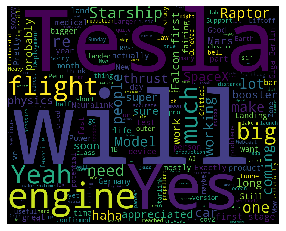

In [95]:
allwords = ' '.join( [tweet for tweet in df['Tweets']] )
wordCloud = WordCloud(width = 1000, height = 800, random_state = 21).generate(allwords)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

We can see the most used word are <b>will, Tesla, Yes</b>. For me, Elon Musk is a really ambitious and full of plan type of person

### Make subjectivity and polarity column

In [88]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [89]:
df['Polarity'] = df['Tweets'].apply(polarity)
df['subjectivity'] = df['Tweets'].apply(subjectivity)
df.head()

,Tweets,Polarity,subjectivity
0,Above 50% likely to make it,0.000000,0.550000
1,This is a test engine. Flight articles are f...,0.100000,0.200000
2,Worth noting that thrust is only slightly hig...,0.110000,0.440000
3,: The first Raptor Vacuum engine (RVac) for St...,0.120833,0.166667
4,Yes,0.000000,0.000000


### Analyzing sentiment based on polarity

In [116]:
def analyze(polarity):
    if polarity > 0.0:
        return '+'
    if polarity == 0.0:
        return '='
    if polarity < 0.0:
        return '-'

df['Analysis'] = df['Polarity'].apply(analyze)
df

,Tweets,Polarity,subjectivity,Analysis
0,Above 50% likely to make it,0.000000,0.550000,=
1,This is a test engine. Flight articles are f...,0.100000,0.200000,+
2,Worth noting that thrust is only slightly hig...,0.110000,0.440000,+
3,: The first Raptor Vacuum engine (RVac) for St...,0.120833,0.166667,+
4,Yes,0.000000,0.000000,=
...,...,...,...,...
195,“Tanks 4 the memery” - panzer of the lake,0.000000,0.000000,=
196,Some big milestones coming up,0.000000,0.100000,=
197,Africa is big,0.000000,0.100000,=
198,"Bold move, sir, bold move",0.333333,0.666667,+


In [117]:
df[0:50]

,Tweets,Polarity,subjectivity,Analysis
0,Above 50% likely to make it,0.000000,0.550000,=
1,This is a test engine. Flight articles are f...,0.100000,0.200000,+
2,Worth noting that thrust is only slightly hig...,0.110000,0.440000,+
3,: The first Raptor Vacuum engine (RVac) for St...,0.120833,0.166667,+
4,Yes,0.000000,0.000000,=
5,Chart understates lithium-ion potential by ro...,-0.050000,0.700000,-
6,Model 3 rated as most reliable car,0.500000,0.500000,+
7,Turns out you can make anything fly haha,0.500000,0.600000,+
8,Exactly. This is not fully appreciated.,0.225000,0.175000,+
9,"Starship SN6 flew asimilar hop to SN5, but it...",0.200000,0.200000,+


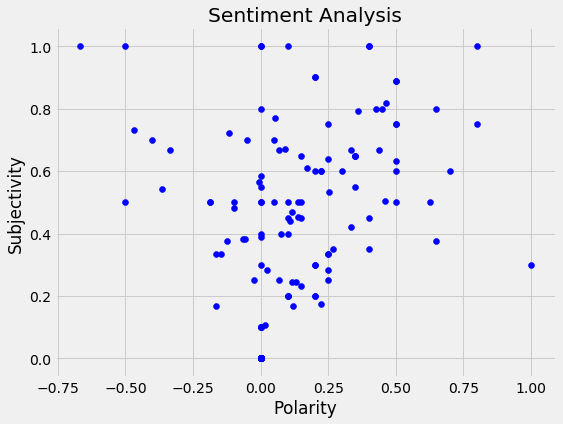

In [114]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')

for p,s in zip(df['Polarity'], df['subjectivity']):
    plt.scatter(p,s, color = 'blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [115]:
positivity = df[df['Analysis'] == '+'].count()['Analysis'] / df.shape[0] * 100
negativity = df[df['Analysis'] == '-'].count()['Analysis'] / df.shape[0] * 100
neutral = df[df['Analysis'] == '='].count()['Analysis'] / df.shape[0] * 100
print(f'positivity = {positivity}%')
print(f'negativity = {negativity}%')
print(f'neutral = {neutral}%')

positivity = 38.5%
negativity = 10.5%
neutral = 51.0%


From this Analysis we can infer that mostly Elon Musk tweet is <b>neutral</b>.